# Session 4: Kernels and Thresholds

In [2]:
# import dependencies
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

__From last week__

- Draw
- Create masks

__From this week__

- Blurring
- Thresholding

## Load image

In [3]:
fname = os.path.join("..", "data", "img", "marilyn.jpg")

In [24]:
image = cv2.imread(fname)

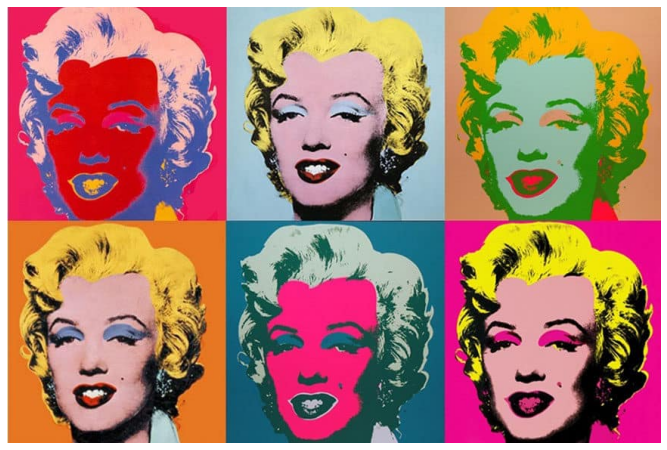

In [6]:
jimshow(image)

## Drawing

__Draw rectangle__

`cv2.rectangle(image, start_point, end_point, color, thickness)`

In [25]:
cv2.rectangle(image, (300,200), (600,225), (0,0,0), (2))

array([[[228, 202, 255],
        [113,  79, 179],
        [ 93,  42, 200],
        ...,
        [113, 157, 220],
        [113, 157, 220],
        [110, 154, 217]],

       [[228, 202, 255],
        [113,  79, 179],
        [ 93,  42, 200],
        ...,
        [113, 157, 220],
        [113, 157, 220],
        [110, 154, 217]],

       [[228, 202, 255],
        [113,  79, 179],
        [ 93,  42, 200],
        ...,
        [113, 157, 220],
        [113, 157, 220],
        [111, 155, 218]],

       ...,

       [[181, 228, 255],
        [ 89, 143, 198],
        [ 52, 116, 204],
        ...,
        [139,   7, 238],
        [139,   7, 238],
        [137,   8, 237]],

       [[181, 228, 255],
        [ 89, 143, 196],
        [ 52, 115, 205],
        ...,
        [139,   7, 238],
        [139,   7, 238],
        [137,   8, 237]],

       [[179, 229, 255],
        [ 88, 145, 197],
        [ 52, 118, 207],
        ...,
        [139,   6, 240],
        [139,   7, 238],
        [137,   8, 237]]

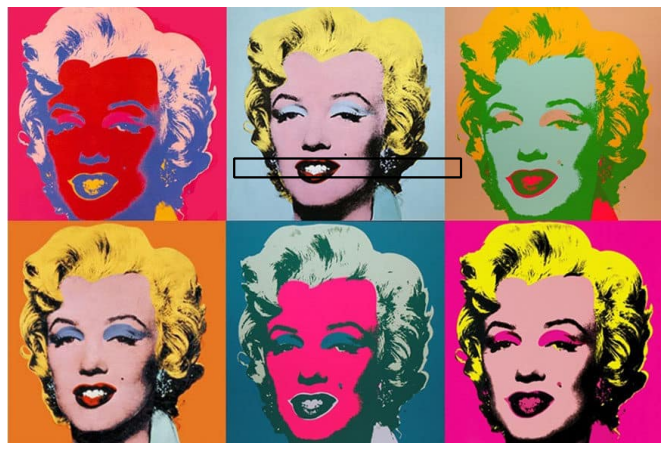

In [26]:
jimshow(image)

__Draw circle__

`cv2.circle(image, center_coordinates, radius, color, thickness)`

In [28]:
(centerX, centerY) = image.shape[1] // 2, image.shape[0] // 2

In [34]:
cv2.circle(image, (centerX, centerY), (100), (0,0,0), 1)

array([[[228, 202, 255],
        [113,  79, 179],
        [ 93,  42, 200],
        ...,
        [113, 157, 220],
        [113, 157, 220],
        [110, 154, 217]],

       [[228, 202, 255],
        [113,  79, 179],
        [ 93,  42, 200],
        ...,
        [113, 157, 220],
        [113, 157, 220],
        [110, 154, 217]],

       [[228, 202, 255],
        [113,  79, 179],
        [ 93,  42, 200],
        ...,
        [113, 157, 220],
        [113, 157, 220],
        [111, 155, 218]],

       ...,

       [[181, 228, 255],
        [ 89, 143, 198],
        [ 52, 116, 204],
        ...,
        [139,   7, 238],
        [139,   7, 238],
        [137,   8, 237]],

       [[181, 228, 255],
        [ 89, 143, 196],
        [ 52, 115, 205],
        ...,
        [139,   7, 238],
        [139,   7, 238],
        [137,   8, 237]],

       [[179, 229, 255],
        [ 88, 145, 197],
        [ 52, 118, 207],
        ...,
        [139,   6, 240],
        [139,   7, 238],
        [137,   8, 237]]

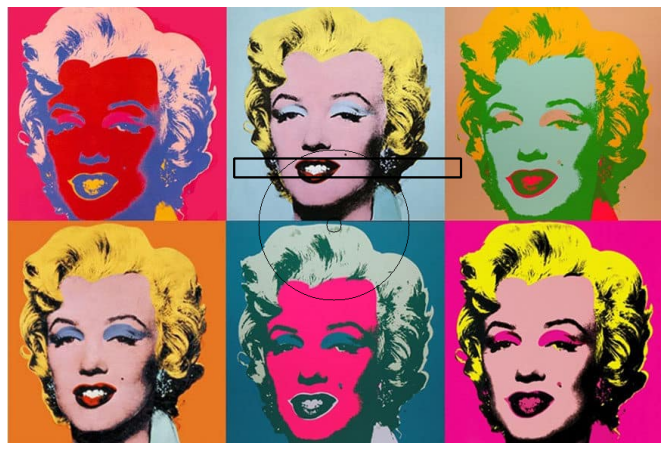

In [35]:
jimshow(image)

## Creating and using masks

In [82]:
image.shape

(577, 865, 3)

In [83]:
# create array of 0s
mask = np.zeros(image.shape[:2], dtype = "uint8")

In [84]:
cv2.rectangle(mask, (50,100), (300,300), 255, -1)
# define contents of the shape, everything inside it is 255

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

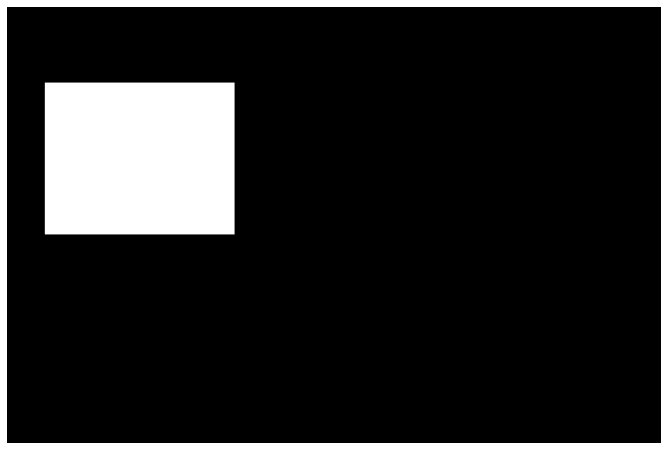

In [85]:
jimshow_channel(mask)

`cv2.bitwise_and(input_image, output_image, mask)`

In [90]:
# get only points in mask
masked = cv2.bitwise_and(image, image, mask = mask)

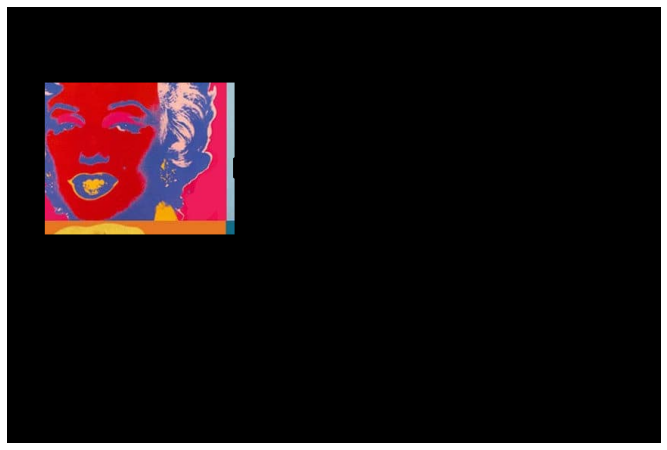

In [91]:
jimshow(masked)

## Group task

Do a circular mask!

In [112]:
# empty mask
mask2 = np.zeros(image.shape[:2], dtype = "uint8")

In [113]:
# circle
cv2.circle(mask2, (160,200), (100), (255,255,255), -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

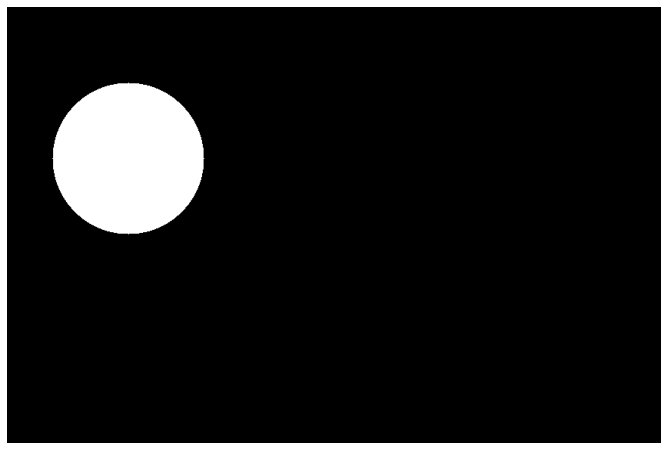

In [114]:
jimshow_channel(mask2)

In [115]:
masked2 = cv2.bitwise_and(image, image, mask = mask2)

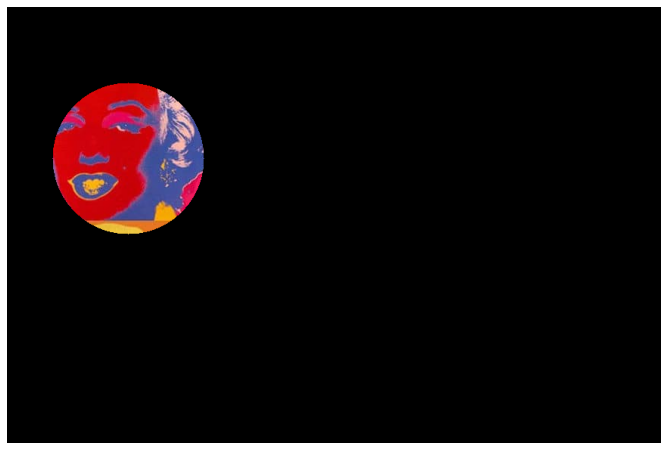

In [116]:
jimshow(masked2)

## Blurring

__Average blur__

In [125]:
image = cv2.imread(fname)

`cv2.blur(image, dimensions_kernel)`

In [126]:
blurred = cv2.blur(image, (3,3))

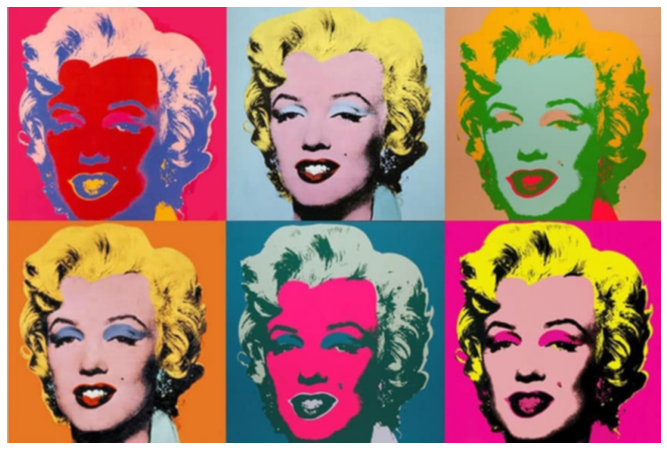

In [127]:
jimshow(blurred)

In [128]:
stacked = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7))
])

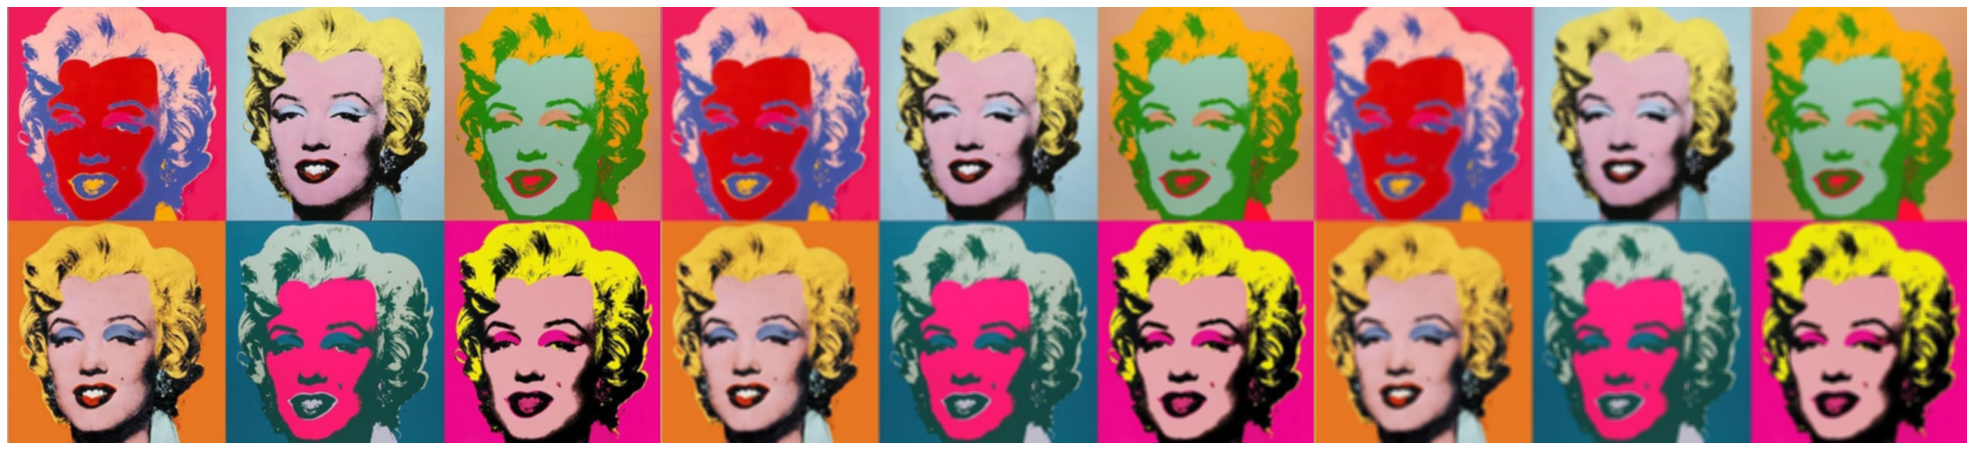

In [129]:
jimshow(stacked)

## Thresholding

In [130]:
image = cv2.imread(fname)

In [131]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

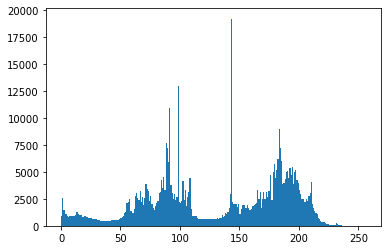

In [138]:
plt.hist(grey_image.flatten(), 256, [0,256])
plt.show()

In [142]:
# blur kernel, avg blurring
blurred = cv2.blur(grey_image, (5,5))

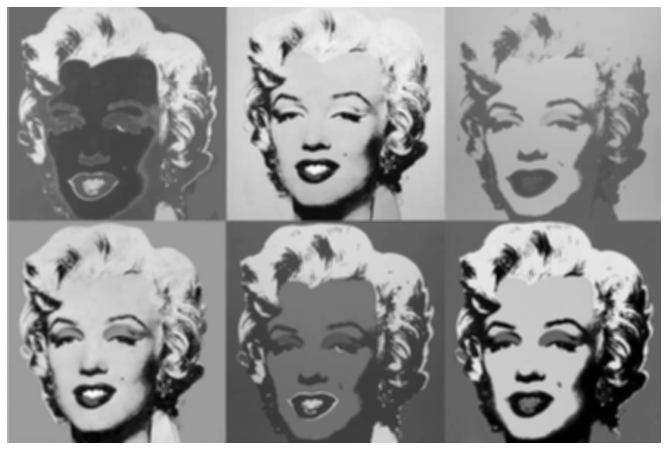

In [143]:
jimshow_channel(blurred)

`cv2.threshold(image, threshold_value, colour, method)`

In [164]:
(T_value, threshold) = cv2.threshold(blurred, 70, 255, cv2.THRESH_BINARY)

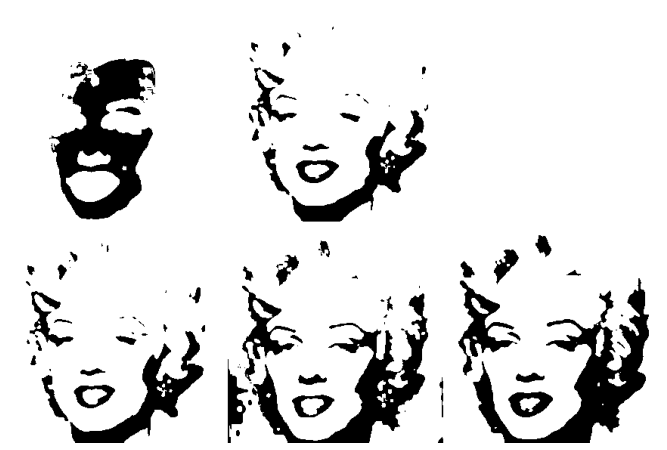

In [165]:
jimshow_channel(threshold)

In [169]:
(T_value, threshold_inv) = cv2.threshold(blurred, 70, 255, cv2.THRESH_BINARY_INV)

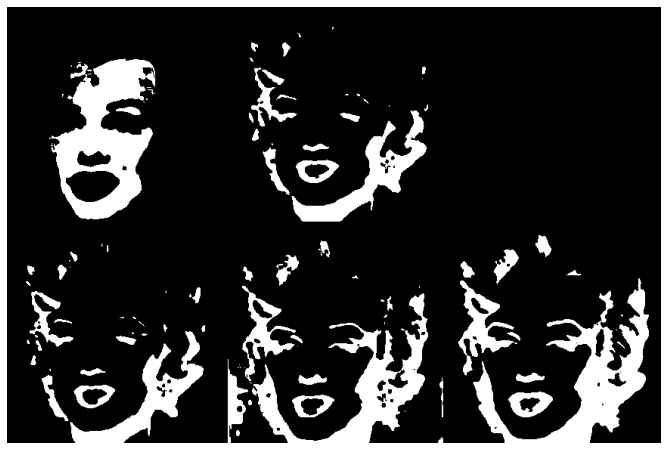

In [170]:
jimshow_channel(threshold_inv)

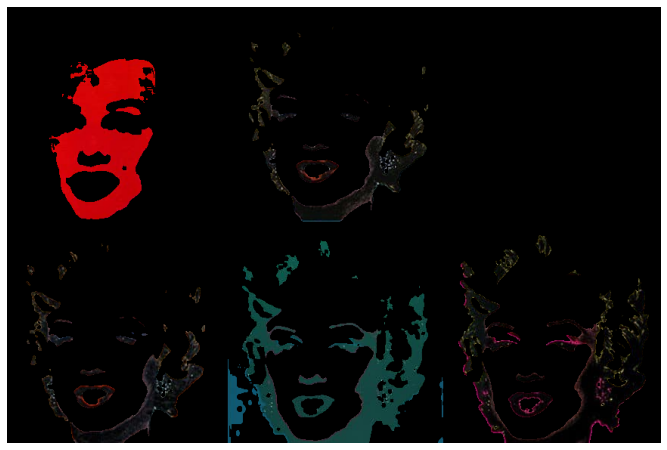

In [171]:
jimshow(cv2.bitwise_and(image, image, mask = threshold_inv))